This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
#lectura de el data set
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000) #solo se cargan 10k palabras por registro 

17473536/17464789 [==============================] - 3s 0us/step


In [5]:
train_data[0], len(train_data[0]) #visualizar los primeros datos, estos datos estam codigicados con numeros, 
              # cada numero es una palabra 

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [3]:
train_labels[0] # las etiquetas solo son unos o ceros si la critica dice que la peli es buena o no

1

In [6]:
max([max(sequence) for sequence in train_data]) #numero máximo de la secuencia 

9999

**Decoding reviews back to text**
    
    - se traduce de nuemros a letras 

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
#se traduce el texto, de numero a letra 
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [8]:
import numpy as np
#todas las listas deben tener la misma cantidad de palabras
def vectorize_sequences(sequences, dimension = 10000):
    '''
    la funcion rellena con ceros todas las criticas
    '''
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0] #vector de ceros y unos 

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
y_train[:5] #critica postivia 1 

array([1., 0., 0., 1., 0.], dtype=float32)

### Building your model

**Model definition**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# red de dos capas intermedias 
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    # la avtivacion relu, manda todos los negativos a cero y los postivos los pone en una 
    # regresion lineal
    layers.Dense(16, activation = "relu"),
    #solo hay una neurona de salida porque, recordemos que lo que lanza es una proba, 
    #si la proba es baja se asigna cero, si es alta se asigna un uno
    layers.Dense(1, activation = "sigmoid") # función sigmoide porque la salida es binaria 
])

**Compiling the model**

In [14]:
model.compile(optimizer = "rmsprop", # funcionm de optimizador
              loss = "binary_crossentropy", #funcion de perdida a optimizar para datos binarios
              metrics = ["accuracy"]) #metrica de rendimiento

### Validating your approach

**Setting aside a validation set**

tenemos que saber si estamos ajustando (fit) bien el modelo, para cercionarnos de esto creamos un conjunto de validación, el cual se prueba a la par del conjunto de entrenamiento, para evitar caer en sobre ajuste o un under ajuste

In [15]:
# la validacion son los ultimos 10k
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
# la validacion son los ultimos 10k de la variable target
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) #en ese renglon se hace la validacion

Epoch 1/20
30/30 [==============================] - 10s 268ms/step - loss: 0.5929 - accuracy: 0.6752 - val_loss: 0.4730 - val_accuracy: 0.8586
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3690 - accuracy: 0.8878 - val_loss: 0.3347 - val_accuracy: 0.8753
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2465 - accuracy: 0.9185 - val_loss: 0.2953 - val_accuracy: 0.8821
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1870 - accuracy: 0.9409 - val_loss: 0.2817 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1530 - accuracy: 0.9494 - val_loss: 0.2808 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1213 - accuracy: 0.9633 - val_loss: 0.3340 - val_accuracy: 0.8761
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1038 - accuracy: 0.9678 - val_loss: 0.3069 - val_accuracy: 0.8809
Epoch 8/20


*_cuando el val loss (perdida en validacion) despues de disminuir, incremente, es signo de un mal ajuste (sobreajuste)_*

*_cuando el accuraccy y el val accuracy cambien también es signo de mal ajuste_*

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

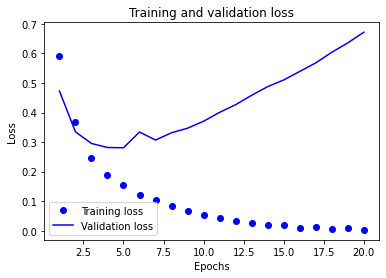

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

con relacion en la perdida, el entranamiento siempre disminuye, pero en la validacion hay un momento en el que crece, en ese instante hay un mal ajuste (sobreajuste)

**Plotting the training and validation accuracy**

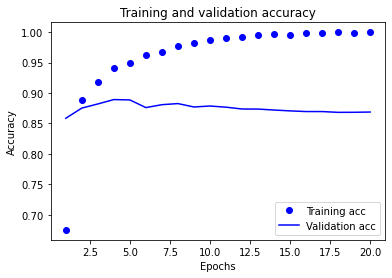

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

El accuracy de entrenamiento siempre crece y crece mientras que el de validación no siempre lo va a hacer, en el momento en el que la validación decremente esta red está ajustando mal (sobreajustando) 

cuando los datos de validacion se estén portando mal, quiere decir ue estamos sobreajustando  

EN ENTRENAMIENTO
- el loss siempre disminuye 
- el accuracy siempre aumenta

EN VALIDACION
Cuando el loss aumenta y/o el accuracy disminuye, hay sobreajuste

**Retraining a model from scratch**

** re entreno del modelo sin sobreajustar **

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# nos damos cuenta que se deja de sobreajustar en la epoca 4 por eso ahora cambiamos de epocas
# también notemos que una vez identificado cuantas son el nuemero de epocas
# el entrenamiento ya es toda la data de entrenamiento, es decir ya no partimos el entrenamiendo para la
# validación
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

# el evaluate va sobre la data de test
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 6s 44ms/step - loss: 0.4589 - accuracy: 0.8195
Epoch 2/4
49/49 [==============================] - 2s 44ms/step - loss: 0.2612 - accuracy: 0.9091
Epoch 3/4
49/49 [==============================] - 2s 43ms/step - loss: 0.2018 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 8s 9ms/step - loss: 0.2935 - accuracy: 0.8836


In [21]:
results

[0.2935250699520111, 0.8836399912834167]

### Using a trained model to generate predictions on new data

predicciones en el test, la salida son probas, todos los valores cercanos a 1 se etiquetaran con 1 y con 0 cuando estén cercanos al cero

In [23]:
model.predict(x_test)

array([[0.16577041],
       [0.9999092 ],
       [0.8071316 ],
       ...,
       [0.11736372],
       [0.06938174],
       [0.5227035 ]], dtype=float32)

In [24]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [25]:
from tensorflow.keras.datasets import reuters
# carga de datos de noticias de reuters y clasificadas en n tipo de noticias
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 1s 0us/step


In [26]:
len(train_data)

8982

In [27]:
len(test_data)

2246

In [28]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [41]:
word_index = reuters.get_word_index()


# traduccion de numeros a letras en noticia
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [30]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [45]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
#se convirtieron a dummies las noticias, si t
x_train[:5], len(x_train[0])

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]),
 10000)

**Encoding the labels**

In [46]:
# funcion para hacer dummies si se clasifica alguna noticia, es decir, tenemos nuemeros en al etiqueta
# con la siguinete función lo que se busca es generar un vector tan largo como numero de clasificaciones 
# haya (46) y en lugar de tener un 3 como clasificación, se tendra un uno en la posición 3 del vector de
# 46 elementos
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [47]:
from tensorflow.keras.utils import to_categorical
# convertir el tipo de dato
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [49]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    # las 46 neuronas de salida son el numero de clasificaciones que tenemos
    # se usa activación softmax para darnos la proba de que la noticia sea
    # del tipo i
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [50]:
model.compile(optimizer = "rmsprop", # función de optimización
              loss = "categorical_crossentropy", #clasificación multiple categoricos
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [51]:
# se hace la partición para validar la red

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
# se hace la partición para validar la red

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [52]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) #datos para validar 

Epoch 1/20
16/16 [==============================] - 6s 179ms/step - loss: 2.8830 - accuracy: 0.4788 - val_loss: 1.9763 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 2s 112ms/step - loss: 1.5863 - accuracy: 0.6908 - val_loss: 1.3946 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 2s 113ms/step - loss: 1.1352 - accuracy: 0.7542 - val_loss: 1.1651 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 2s 106ms/step - loss: 0.8851 - accuracy: 0.8182 - val_loss: 1.0342 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 2s 118ms/step - loss: 0.7112 - accuracy: 0.8547 - val_loss: 0.9842 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 2s 110ms/step - loss: 0.5709 - accuracy: 0.8867 - val_loss: 0.9320 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 2s 119ms/step - loss: 0.4647 - accuracy: 0.9062 - val_loss: 0.9012 - val_accuracy: 0.8110
Epoch 

**Plotting the training and validation loss**

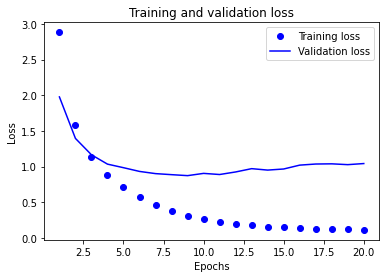

In [53]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

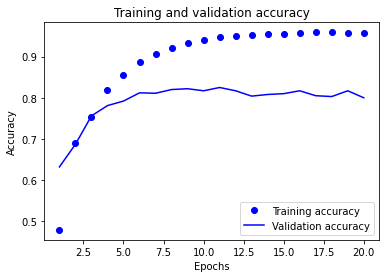

In [54]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

Se reentrena el modelo pero ahora con toda la data de train y con solo 9 epocas para evitar el sobreajuste 

In [55]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 5s 101ms/step - loss: 2.5192 - accuracy: 0.5220
Epoch 2/9
18/18 [==============================] - 2s 103ms/step - loss: 1.3064 - accuracy: 0.7300
Epoch 3/9
18/18 [==============================] - 2s 98ms/step - loss: 0.9729 - accuracy: 0.7995
Epoch 4/9
18/18 [==============================] - 2s 95ms/step - loss: 0.7609 - accuracy: 0.8400
Epoch 5/9
18/18 [==============================] - 2s 92ms/step - loss: 0.6004 - accuracy: 0.8733
Epoch 6/9
18/18 [==============================] - 2s 107ms/step - loss: 0.4768 - accuracy: 0.8976
Epoch 7/9
18/18 [==============================] - 2s 98ms/step - loss: 0.3889 - accuracy: 0.9175
Epoch 8/9
18/18 [==============================] - 2s 94ms/step - loss: 0.3145 - accuracy: 0.9320
Epoch 9/9
71/71 [==============================] - 2s 12ms/step - loss: 0.9417 - accuracy: 0.8014


In [56]:
results

[0.9417079091072083, 0.8014247417449951]

In [57]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19634906500445237

### Generating predictions on new data

In [58]:
predictions = model.predict(x_test)

In [59]:
predictions[0].shape

(46,)

In [60]:
np.sum(predictions[0])

1.0

In [61]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [62]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [64]:
model.compile(optimizer="rmsprop",
              #la perdida cambia porque ahora ya no se predice sobre un vector
              #sino sobre un escalar
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

#este modelo no se entrena pero nomas muestras como 

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

el cuello de botella tarda más y podría arrojar resultados no muy buenos 


In [65]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    # cuello de botella 
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 7s 63ms/step - loss: 3.5279 - accuracy: 0.0550 - val_loss: 3.1786 - val_accuracy: 0.1010
Epoch 2/20
63/63 [==============================] - 3s 50ms/step - loss: 2.7380 - accuracy: 0.3161 - val_loss: 2.3535 - val_accuracy: 0.5830
Epoch 3/20
63/63 [==============================] - 3s 52ms/step - loss: 1.8591 - accuracy: 0.6146 - val_loss: 1.6581 - val_accuracy: 0.6230
Epoch 4/20
63/63 [==============================] - 3s 47ms/step - loss: 1.3880 - accuracy: 0.6455 - val_loss: 1.4742 - val_accuracy: 0.6580
Epoch 5/20
63/63 [==============================] - 3s 47ms/step - loss: 1.2161 - accuracy: 0.6899 - val_loss: 1.4128 - val_accuracy: 0.6620
Epoch 6/20
63/63 [==============================] - 3s 49ms/step - loss: 1.1029 - accuracy: 0.7087 - val_loss: 1.3924 - val_accuracy: 0.6750
Epoch 7/20
63/63 [==============================] - 3s 45ms/step - loss: 1.0129 - accuracy: 0.7241 - val_loss: 1.3749 - val_accuracy: 0.6810
Epoch 8/20
63

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

Red Neuronal de regresion

**Loading the Boston housing dataset**

In [9]:
from tensorflow.keras.datasets import boston_housing
# importando data set de precio de casas en boston

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [10]:
train_data.shape # 13 variables predictoras

(404, 13)

In [11]:
test_data.shape

(102, 13)

In [12]:
train_targets #precio de casas en miles de dolares

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [13]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

### Preparing the data

**Normalizing the data**

In [6]:
# normalizando la data 

mean = train_data.mean(axis=0) #sacamos la media
train_data -= mean # restamos la media a cada registro
std = train_data.std(axis=0) #sacamos la desviacion estandar
train_data /= std # dividimos entre la desviacion estantar 

# ojo, la estadarizacion de la data de test es con la media y
# desviación estandar del conjunto de entrenamiento 
test_data -= mean
test_data /= std

In [8]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

### Building your model

**Model definition**

##### pocos datos implica aplicar una red pequeña
    - esto implica un conjunto de evaluacion pequeño lo que implica
        - varianza grande en los resultadps de la evaluación
        -  modelo pobre
        
##### lo que se busca es un numeroso dados de entrenamiento 
    - merjora el entrenamiento de la red 
    - implica mayor datos en test 
        - da un mejor desempeño de la red
        
#### cuando tenemos pocos datos hacemos K-fold cross-validation
es decir, partimos el tren y test k veces en diferentes partes del conjunto de datos 

In [71]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = "relu"),
        layers.Dense(64, activation = "relu"),
        layers.Dense(1) #activación lineal por default
    ])
    model.compile(optimizer = "rmsprop", 
                  loss = "mse", 
                  metrics = ["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

nota: esta fold-k validacionsólo es con el entrenamiento

In [72]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    #validacion con la k-esima folk-k validacion 
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    #entrenamiento parcial
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    #modelando
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [73]:
all_scores

[2.149404764175415, 2.4169533252716064, 2.534949541091919, 2.4459056854248047]

In [74]:
np.mean(all_scores)

2.3868033289909363

**Saving the validation logs at each fold**

In [75]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs, batch_size = 16, verbose = 0)
    #se guardan las metrucas de validacion es decir las perdidas
    mae_history = history.history["val_mae"] #guardadndo los ajustes historicos
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [76]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

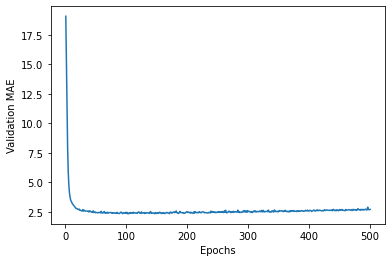

In [77]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

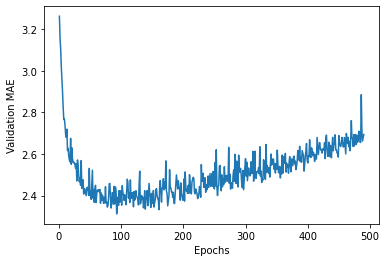

In [78]:
truncated_mae_history = average_mae_history[10:] #pintando a partir del dato 10
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [79]:
model = build_model()
model.fit(train_data, train_targets,# se entrena todo el modelo con todo el train
          epochs=130, batch_size=16, verbose=0) #ajustamos el modelo con las epocas adecuadas

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.7543 - mae: 2.6113


In [80]:
test_mae_score

2.61128830909729

### Generating predictions on new data

In [81]:
predictions = model.predict(test_data)
predictions[0]

array([6.5744658], dtype=float32)

Comparemos los primeros 10 resultados reales vs predicciones

In [85]:
print(np.c_[test_targets[:9], predictions[:9]])

[[ 7.2         6.57446575]
 [18.8        18.27749825]
 [19.         20.64914703]
 [27.         34.9199295 ]
 [22.2        23.45636749]
 [24.5        21.52883911]
 [31.2        26.65435791]
 [22.9        19.93310928]
 [20.5        18.56924057]]


### Wrapping up

## Summary